In [37]:
import xgboost as xgb

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\archive\weatherHistory.csv")

In [40]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [41]:
df.shape

(96453, 12)

In [42]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [43]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [44]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [45]:
from sklearn.preprocessing import minmax_scale

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
df["Wind Bearing (degrees)"] = minmax_scale(df["Wind Bearing (degrees)"])

In [48]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [49]:
encoded_data = encoder.fit_transform(df[["Daily Summary"]])

In [50]:
feature_names = encoder.get_feature_names_out(["Daily Summary"])

In [51]:
feature_names

array(['Daily Summary_Breezy and foggy starting in the evening.',
       'Daily Summary_Breezy and foggy until morning.',
       'Daily Summary_Breezy and mostly cloudy overnight.',
       'Daily Summary_Breezy and partly cloudy in the afternoon.',
       'Daily Summary_Breezy in the morning and foggy in the evening.',
       'Daily Summary_Breezy in the morning and mostly cloudy starting in the evening.',
       'Daily Summary_Breezy in the morning and mostly cloudy starting in the morning.',
       'Daily Summary_Breezy in the morning and partly cloudy starting in the evening continuing until night.',
       'Daily Summary_Breezy overnight and mostly cloudy throughout the day.',
       'Daily Summary_Breezy overnight and overcast throughout the day.',
       'Daily Summary_Breezy overnight and partly cloudy throughout the day.',
       'Daily Summary_Breezy overnight and partly cloudy until evening.',
       'Daily Summary_Breezy starting in the afternoon continuing until evening and

In [52]:
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

In [53]:
encoded_df

,Daily Summary_Breezy and foggy starting in the evening.,Daily Summary_Breezy and foggy until morning.,Daily Summary_Breezy and mostly cloudy overnight.,Daily Summary_Breezy and partly cloudy in the afternoon.,Daily Summary_Breezy in the morning and foggy in the evening.,Daily Summary_Breezy in the morning and mostly cloudy starting in the evening.,Daily Summary_Breezy in the morning and mostly cloudy starting in the morning.,Daily Summary_Breezy in the morning and partly cloudy starting in the evening continuing until night.,Daily Summary_Breezy overnight and mostly cloudy throughout the day.,Daily Summary_Breezy overnight and overcast throughout the day.,Daily Summary_Breezy overnight and partly cloudy throughout the day.,Daily Summary_Breezy overnight and partly cloudy until evening.,Daily Summary_Breezy starting in the afternoon continuing until evening and foggy in the evening.,Daily Summary_Breezy starting in the afternoon continuing until evening and foggy starting in the evening.,Daily Summary_Breezy starting in the afternoon continuing until night and mostly cloudy starting in the evening.,Daily Summary_Breezy starting in the morning continuing until afternoon and mostly cloudy starting in the morning.,Daily Summary_Breezy starting in the morning continuing until afternoon and partly cloudy starting in the morning.,Daily Summary_Breezy starting in the morning continuing until night.,Daily Summary_Breezy starting overnight continuing until afternoon and foggy starting in the morning continuing until evening.,Daily Summary_Breezy starting overnight continuing until afternoon and mostly cloudy starting overnight continuing until evening.,Daily Summary_Breezy starting overnight continuing until morning and foggy in the evening.,Daily Summary_Breezy starting overnight continuing until morning and foggy overnight.,Daily Summary_Breezy starting overnight continuing until morning and partly cloudy starting in the morning.,Daily Summary_Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.,Daily Summary_Breezy starting overnight continuing until morning.,Daily Summary_Breezy until afternoon and mostly cloudy throughout the day.,Daily Summary_Breezy until afternoon and overcast throughout the day.,Daily Summary_Breezy until evening and foggy in the morning.,Daily Summary_Breezy until morning and mostly cloudy throughout the day.,Daily Summary_Clear throughout the day.,Daily Summary_Drizzle starting in the evening.,Daily Summary_Drizzle until morning.,Daily Summary_Foggy in the afternoon.,Daily Summary_Foggy in the evening.,Daily Summary_Foggy in the morning and breezy starting in the afternoon continuing until night.,Daily Summary_Foggy in the morning.,Daily Summary_Foggy overnight and breezy in the morning.,Daily Summary_Foggy overnight.,Daily Summary_Foggy starting in the afternoon and breezy starting in the afternoon continuing until evening.,Daily Summary_Foggy starting in the afternoon continuing until evening.,...,Daily Summary_Partly cloudy starting overnight continuing until afternoon and breezy in the afternoon.,Daily Summary_Partly cloudy starting overnight continuing until afternoon.,Daily Summary_Partly cloudy starting overnight continuing until evening and breezy in the evening.,Daily Summary_Partly cloudy starting overnight continuing until evening and breezy in the morning.,Daily Summary_Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until afternoon.,Daily Summary_Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until evening.,Daily Summary_Partly cloudy starting overnight continuing until evening and windy starting in the morning continuing until evening.,Daily Summary_Partly cloudy starting overnight continuing until evening.,Daily Summary_Partly cloudy starting overnight continuing until morning and breezy starting in the morning continuing 

In [54]:
df = pd.concat([df, encoded_df], axis=1)

In [55]:
df.shape

(96453, 226)

In [56]:
df.drop(columns=["Daily Summary"], inplace=True)

In [57]:
df.shape

(96453, 225)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       ...
       'Daily Summary_Partly cloudy until evening.',
       'Daily Summary_Partly cloudy until morning.',
       'Daily Summary_Partly cloudy until night and breezy in the afternoon.',
       'Daily Summary_Partly cloudy until night and breezy in the morning.',
       'Daily Summary_Partly cloudy until night and breezy starting in the morning continuing until afternoon.',
       'Daily Summary_Partly cloudy until night.',
       'Daily Summary_Rain throughout the day.',
       'Daily Summary_Rain until afternoon.',
       'Daily Summary_Rain until morning.',
       'Daily Summary_Windy in the afternoon.'],
      dtype='object', length=225)

In [60]:
features = ['Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Loud Cover',
       'Pressure (millibars)'] + list(feature_names)
target = ['Visibility (km)']
X = df[features]
y = df[target]

In [85]:
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

In [90]:
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.1)

In [88]:
params_grid = {
  'n_estimators' : [2000], 'max_depth' : [4,6,7,9], 
  'reg_lambda' : [0.1, 1, 5, 25], 'gamma' : [0, 0.1, 1, 5, 10, 25], 
  'subsample' : [0.8, 0.9], 'colsample_bytree': [0.8, 0.9] , 'early_stopping_rounds' : [5, 10, 20]   
}

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
model = xgb.XGBRegressor()

In [83]:
x_train.shape

(77162, 221)

In [84]:
y_train.shape

(19291, 221)

In [92]:
search = RandomizedSearchCV(estimator=model, param_distributions=params_grid, n_iter=15, cv=3)
search.fit(X=x_train, y=y_train, eval_set= [(x_val, y_val)])

[0]	validation_0-rmse:3.62278
[1]	validation_0-rmse:3.29494
[2]	validation_0-rmse:3.09328
[3]	validation_0-rmse:2.98557
[4]	validation_0-rmse:2.91152
[5]	validation_0-rmse:2.87037
[6]	validation_0-rmse:2.84386
[7]	validation_0-rmse:2.81706
[8]	validation_0-rmse:2.80457
[9]	validation_0-rmse:2.79402
[10]	validation_0-rmse:2.78351
[11]	validation_0-rmse:2.77636
[12]	validation_0-rmse:2.77015
[13]	validation_0-rmse:2.76195
[14]	validation_0-rmse:2.75616
[15]	validation_0-rmse:2.74973
[16]	validation_0-rmse:2.74357
[17]	validation_0-rmse:2.74188
[18]	validation_0-rmse:2.73336
[19]	validation_0-rmse:2.73029
[20]	validation_0-rmse:2.72618
[21]	validation_0-rmse:2.72425
[22]	validation_0-rmse:2.71955
[23]	validation_0-rmse:2.71215
[24]	validation_0-rmse:2.70661
[25]	validation_0-rmse:2.70288
[26]	validation_0-rmse:2.70113
[27]	validation_0-rmse:2.69973
[28]	validation_0-rmse:2.69768
[29]	validation_0-rmse:2.69753
[30]	validation_0-rmse:2.69383
[31]	validation_0-rmse:2.68989
[32]	validation_0-

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=15,
                   param_distributions={'colsample_bytree': [0.8, 0.9],
                                        'early_stopping_rounds': [5, 10, 20],
                                        'gamma': [0, 0.1, 1, 5, 10, 25],
                                        'max_depth': [4, 6, 7, 9],
                                        'n_estimators': [2000],
                                        'reg_lambda': [0.1, 1, 5, 25],
                                        'subsample': [0.8, 0.9]})

In [93]:
search.best_params_

{'subsample': 0.9,
 'reg_lambda': 1,
 'n_estimators': 2000,
 'max_depth': 7,
 'gamma': 1,
 'early_stopping_rounds': 20,
 'colsample_bytree': 0.8}

In [94]:
search.best_score_

0.6124158302942911

In [96]:
best_model = search.best_estimator_

In [97]:
best_model.feature_importances_

array([0.00694715, 0.0028443 , 0.02090804, 0.00404875, 0.00255288,
       0.        , 0.0030821 , 0.00277747, 0.00165902, 0.00127633,
       0.0008972 , 0.00163769, 0.00179319, 0.00049746, 0.00134669,
       0.00775185, 0.00134316, 0.00410078, 0.00139087, 0.00545322,
       0.00472452, 0.00069678, 0.00052312, 0.00112585, 0.00272468,
       0.00157788, 0.00125855, 0.00104994, 0.00232682, 0.00177108,
       0.00127196, 0.00217423, 0.00232013, 0.00066779, 0.00108174,
       0.00204413, 0.00689897, 0.00060339, 0.00914289, 0.00319025,
       0.0039364 , 0.0014755 , 0.01109021, 0.00087953, 0.00635097,
       0.00246376, 0.00408377, 0.01499288, 0.01622897, 0.00305013,
       0.00841751, 0.00177654, 0.00967458, 0.00661714, 0.00997906,
       0.01046987, 0.01180006, 0.0020452 , 0.02363807, 0.02065179,
       0.00205766, 0.00509781, 0.00380429, 0.00167215, 0.01971871,
       0.02060737, 0.02315847, 0.06249142, 0.02533542, 0.02448937,
       0.02046481, 0.03823986, 0.00073074, 0.00203924, 0.00165

In [98]:
best_model.feature_names_in_

array(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Loud Cover',
       'Pressure (millibars)',
       'Daily Summary_Breezy and foggy starting in the evening.',
       'Daily Summary_Breezy and foggy until morning.',
       'Daily Summary_Breezy and mostly cloudy overnight.',
       'Daily Summary_Breezy and partly cloudy in the afternoon.',
       'Daily Summary_Breezy in the morning and foggy in the evening.',
       'Daily Summary_Breezy in the morning and mostly cloudy starting in the evening.',
       'Daily Summary_Breezy in the morning and mostly cloudy starting in the morning.',
       'Daily Summary_Breezy in the morning and partly cloudy starting in the evening continuing until night.',
       'Daily Summary_Breezy overnight and mostly cloudy throughout the day.',
       'Daily Summary_Breezy overnight and overcast throughout the day.',
       'Daily Summary_Breezy overnight and partly cloudy throughout the

In [104]:
feature_importances = best_model.feature_importances_
sorted_idx = feature_importances.argsort()

In [101]:
import matplotlib.pyplot as plt

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

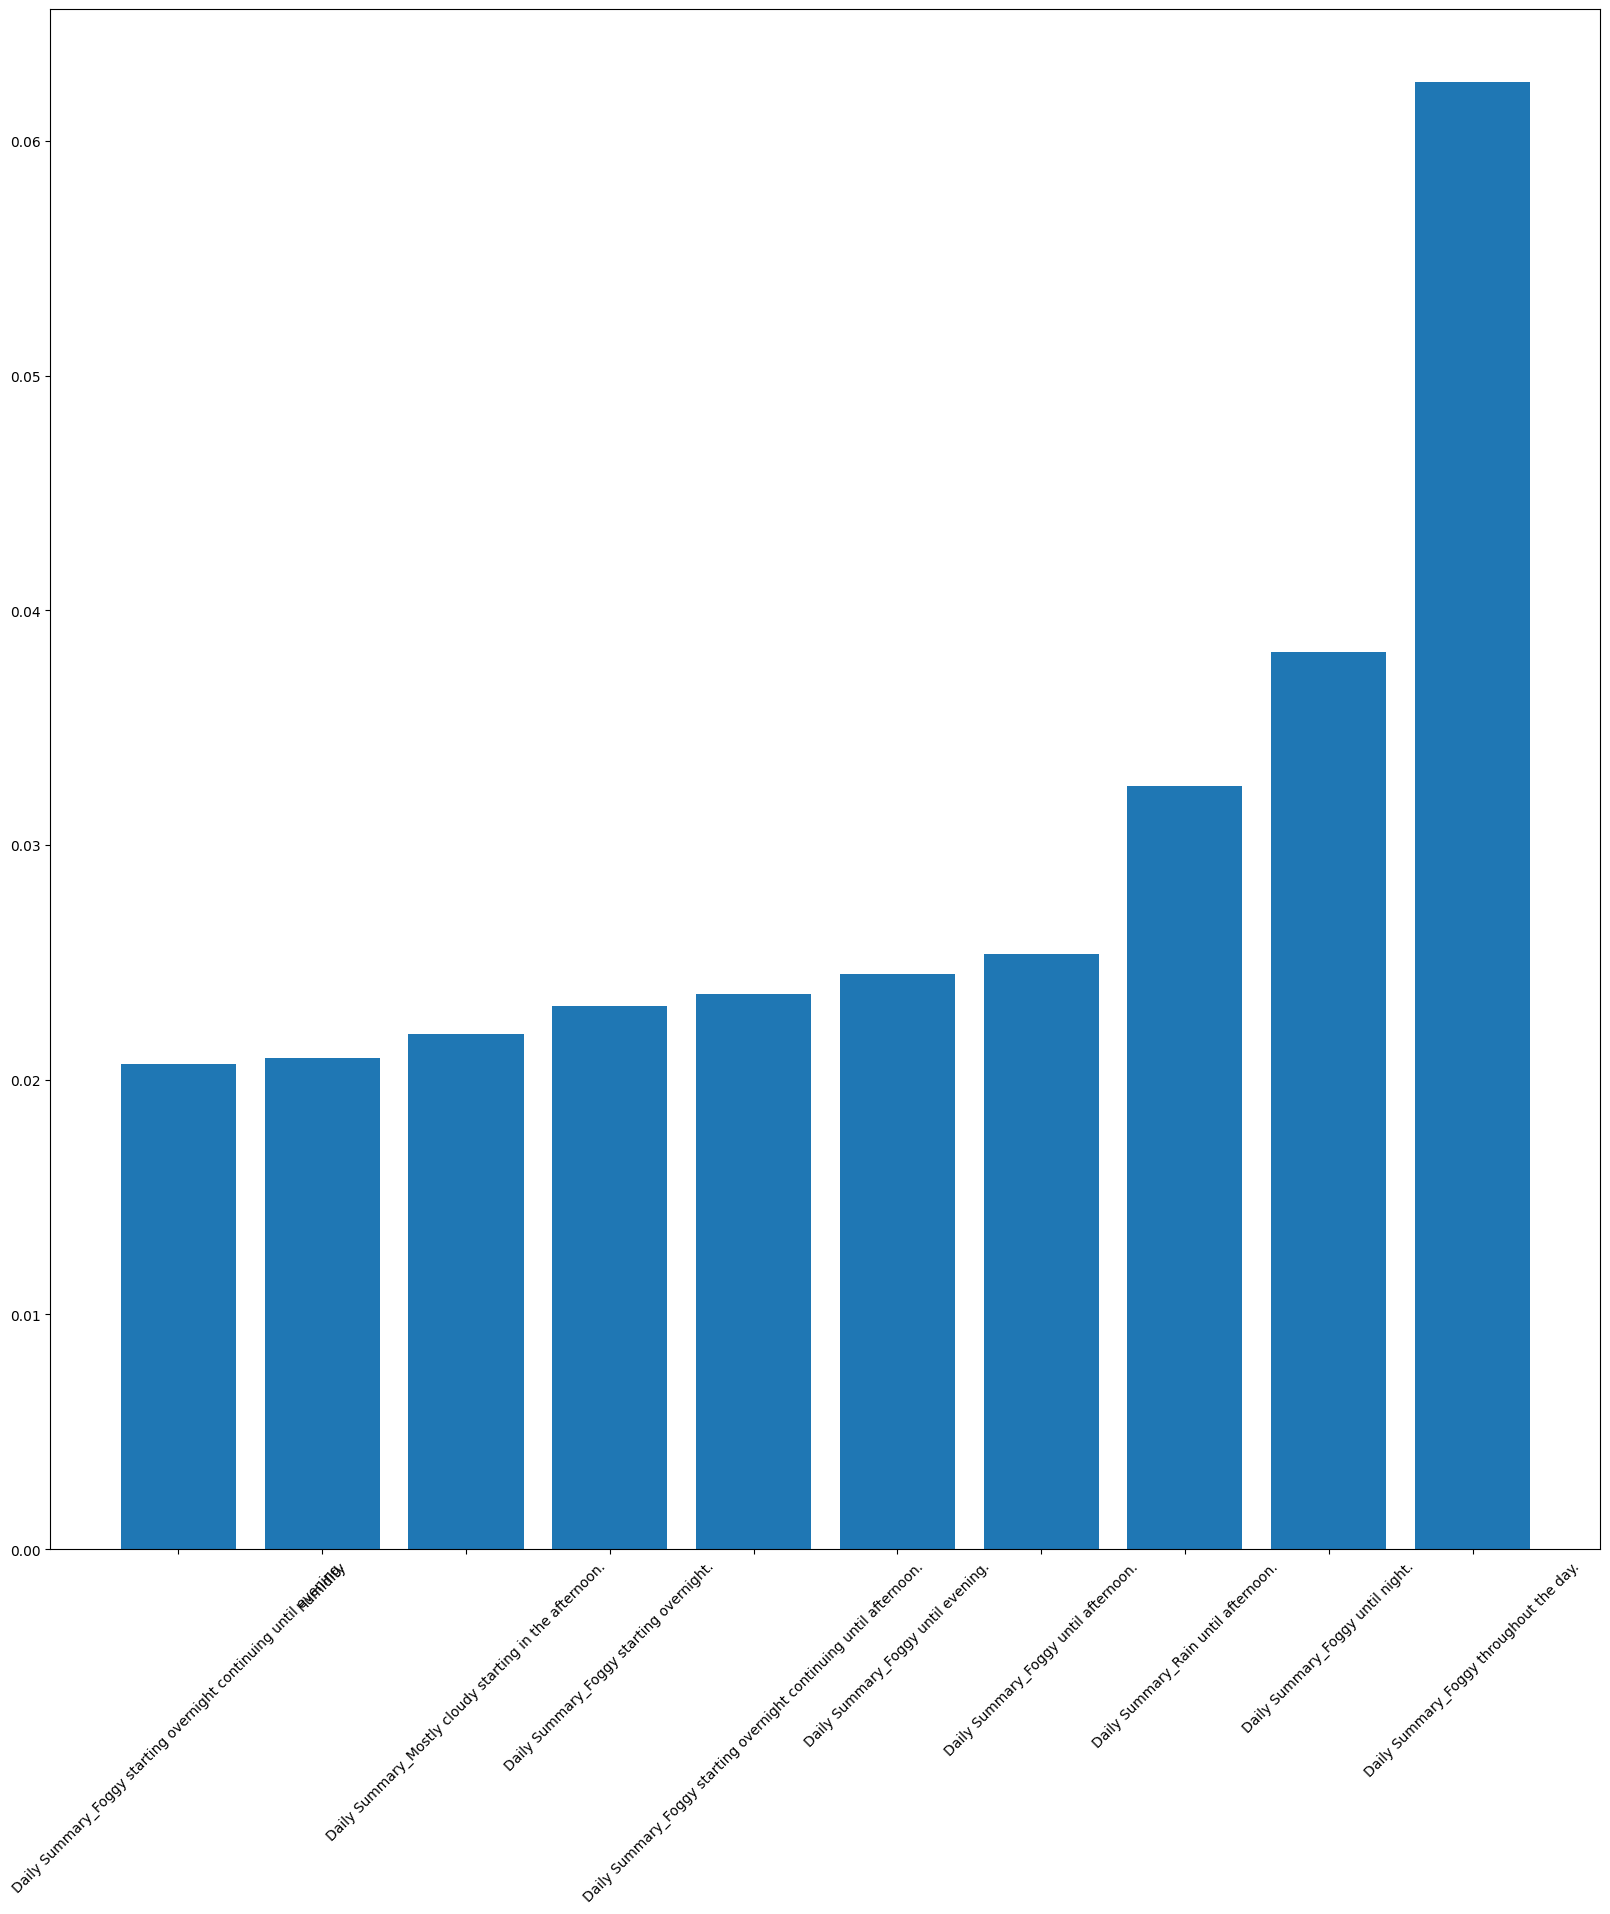

In [119]:
plt.figure(figsize=(20,20))
plt.bar(x_train.columns[sorted_idx][-10:], feature_importances[sorted_idx][-10:])
plt.xticks(range(10), labels=x_train.columns[sorted_idx][-10:],  rotation = 45)
plt.show()

In [122]:
y_pred = best_model.predict(x_test)

from sklearn.metrics import mean_absolute_percentage_error

In [123]:
mean_absolute_percentage_error(y_pred, y_test)

0.3028732911175824

In [127]:
df['Formatted Date'].iloc[100]

'2006-04-13 04:00:00.000 +0200'

In [140]:
df['date'] = pd.to_datetime(df['Formatted Date'], errors='coerce', utc=True)

In [142]:
df['date'].dt.month

0        3
1        3
2        4
3        4
4        4
        ..
96448    9
96449    9
96450    9
96451    9
96452    9
Name: date, Length: 96453, dtype: int32

In [145]:
(df['date'].iloc[0] - df['date'].iloc[3]).days

-1

In [146]:
df.sort_values(by=['date'], inplace=True)

In [149]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       ...
       'Daily Summary_Partly cloudy until morning.',
       'Daily Summary_Partly cloudy until night and breezy in the afternoon.',
       'Daily Summary_Partly cloudy until night and breezy in the morning.',
       'Daily Summary_Partly cloudy until night and breezy starting in the morning continuing until afternoon.',
       'Daily Summary_Partly cloudy until night.',
       'Daily Summary_Rain throughout the day.',
       'Daily Summary_Rain until afternoon.',
       'Daily Summary_Rain until morning.',
       'Daily Summary_Windy in the afternoon.', 'date'],
      dtype='object', length=226)

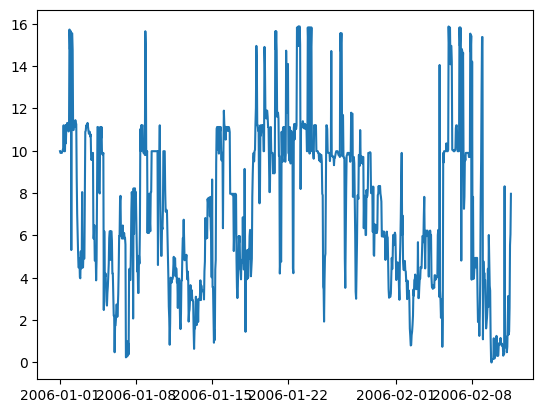

In [153]:
slice = df.iloc[:1000]
plt.plot(slice['date'], slice['Visibility (km)'])